# Introduction to Geopandas
### in Python

GeoPandas is a library for working with spatial (typically geographic) data. It extends the functionality of pandas to support spatial data types and operations, making it easier to analyze, visualize, and manipulate spatial data. Many of the tasks that are typically done within a GIS can be done via geopandas.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Loading, Exploring, and Geometric Data Types

overview of data types

In [2]:
transit_stops = gpd.read_file("data/ttc_stops.geojson")
transit_routes = gpd.read_file("data/ttc_routes.geojson")
census_tracts = gpd.read_file("data/toronto_census_tract_2021.shp")
census_data = pd.read_csv("data/census_tract_data_sample.csv")

explanation of data

Let's take a look at the first layer, the transit stops. We have two columns with text, and a third with geometry data.

In [5]:
transit_stops

,LOCATION_N,NAME,geometry
0,Avenue,Eglinton Crosstown LRT,POINT (-79.40851 43.70460)
1,Forest Hill,Eglinton Crosstown LRT,POINT (-79.42556 43.70102)
2,Leaside,Eglinton Crosstown LRT,POINT (-79.37715 43.71105)
3,Sloane,Eglinton Crosstown LRT,POINT (-79.31352 43.72597)
4,Birchmount,Eglinton Crosstown LRT,POINT (-79.27791 43.73006)
...,...,...,...
101,Vaughan Metropolitan Centre,Toronto-York Spadina Subway Extension,POINT (-79.52727 43.79351)
102,Sheppard-Yonge,Sheppard Subway,POINT (-79.41092 43.76151)
103,Spadina,Bloor-Danforth Subway,POINT (-79.40397 43.66728)
104,St. George,Bloor-Danforth Subway,POINT (-79.39930 43.66827)


The data can be manipulated like a regular pandas data frame. For example, if we want to filter out all stations on the "Eglinton Crosstown LRT" line, since it hasn't been completed yet (at the time of writing), we can do so as follows:

In [6]:
transit_stops = transit_stops.loc[transit_stops["NAME"] != "Eglinton Crosstown LRT"]
transit_stops

,LOCATION_N,NAME,geometry
25,Kipling,Bloor-Danforth Subway,POINT (-79.53628 43.63694)
26,Islington,Bloor-Danforth Subway,POINT (-79.52459 43.64532)
27,Royal York,Bloor-Danforth Subway,POINT (-79.51129 43.64811)
28,Old Mill,Bloor-Danforth Subway,POINT (-79.49509 43.65007)
29,Jane,Bloor-Danforth Subway,POINT (-79.48446 43.64979)
...,...,...,...
101,Vaughan Metropolitan Centre,Toronto-York Spadina Subway Extension,POINT (-79.52727 43.79351)
102,Sheppard-Yonge,Sheppard Subway,POINT (-79.41092 43.76151)
103,Spadina,Bloor-Danforth Subway,POINT (-79.40397 43.66728)
104,St. George,Bloor-Danforth Subway,POINT (-79.39930 43.66827)


We can do the same for the transit lines data. Here the data are coded as a `MULTILINESTRING`, essentially a combination of lines that combine into one object. There are also `MULTIPOLYGON` geometry types

In [7]:
transit_routes = transit_routes.loc[transit_routes["NAME"] != "Eglinton Crosstown LRT"]
transit_routes

,STATUS,TECHNOLOGY,NAME,geometry
0,Existing,Subway,Sheppard Subway,"MULTILINESTRING ((-79.41092 43.76151, -79.4096..."
1,Existing,Subway,Yonge-University-Spadina Subway,"MULTILINESTRING ((-79.46247 43.75043, -79.4621..."
2,Existing,Subway,Spadina Subway Extension,"MULTILINESTRING ((-79.52727 43.79351, -79.5261..."
4,Existing,Subway,Scarborough RT,"MULTILINESTRING ((-79.26453 43.73226, -79.2632..."
5,Existing,Subway,Bloor Subway,"MULTILINESTRING ((-79.26453 43.73226, -79.2669..."


TODO: basic methods (crs, total_bounds)

## Basic Static Plots

We explore geometry simply by plotting using `.plot()`. We can do this for any row, or the entire GeoDataFrame

<Axes: >

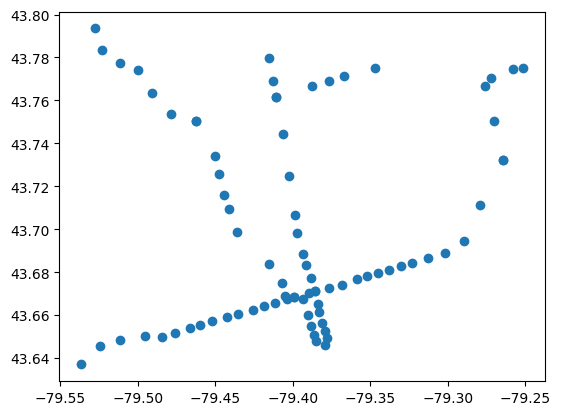

In [11]:
transit_stops.plot()

This is the default plot, but we can tweak the colours, add multiple layers, and change some of the layout options using [matplotlib](https://matplotlib.org/), probably the most commonly used map. Here's a very simple schematic of rapid transit in Toronto (circa 2021)

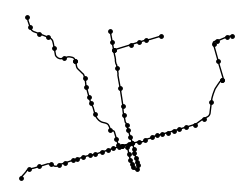

In [12]:
fig, ax = plt.subplots(ncols = 1, figsize=(3, 3))

transit_stops.plot(
    color="Black",
    markersize = 6,
    ax = ax
)

transit_routes.plot(
    linewidth = 1,
    color="Black",
    ax = ax
).set_axis_off()

Let's take a look at the census tract data. Here we have polygon geometries.

In [13]:
census_tracts

,id,ctuid,dguid,ctname,landarea,pruid,geometry
0,487,5350128.04,2021S05075350128.04,0128.04,0.1620,35,"POLYGON ((629437.750 4839364.950, 629247.561 4..."
1,502,5350363.06,2021S05075350363.06,0363.06,0.8210,35,"POLYGON ((640741.738 4848050.419, 640723.345 4..."
2,506,5350363.07,2021S05075350363.07,0363.07,2.2422,35,"POLYGON ((642782.718 4849973.938, 642781.180 4..."
3,508,5350378.23,2021S05075350378.23,0378.23,1.5314,35,"POLYGON ((639248.900 4849901.332, 639248.900 4..."
4,509,5350378.24,2021S05075350378.24,0378.24,2.5129,35,"POLYGON ((639952.255 4850407.204, 639952.255 4..."
...,...,...,...,...,...,...,...
580,5861,5350210.04,2021S05075350210.04,0210.04,0.4751,35,"MULTIPOLYGON (((623047.314 4831182.748, 623047..."
581,5862,5350062.03,2021S05075350062.03,0062.03,0.4638,35,"POLYGON ((629776.795 4835352.843, 629766.377 4..."
582,5863,5350062.04,2021S05075350062.04,0062.04,0.1215,35,"POLYGON ((630319.668 4835517.832, 630149.660 4..."
583,5864,5350017.01,2021S05075350017.01,0017.01,0.8026,35,"POLYGON ((633075.947 4834744.346, 633089.159 4..."


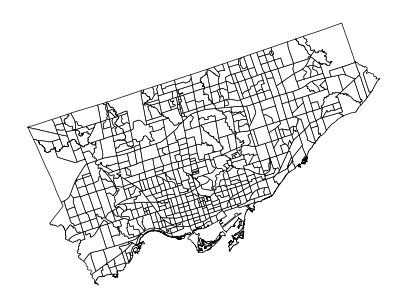

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

census_tracts.plot(
    edgecolor="Black",
    color="White",
    linewidth=0.5,
    ax = ax
).set_axis_off()

Let's try to make a choropleth map. We'll have to join in the tabular data in `census_data`

In [15]:
census_tracts_data = census_tracts.merge(census_data, how='left', on='ctuid')

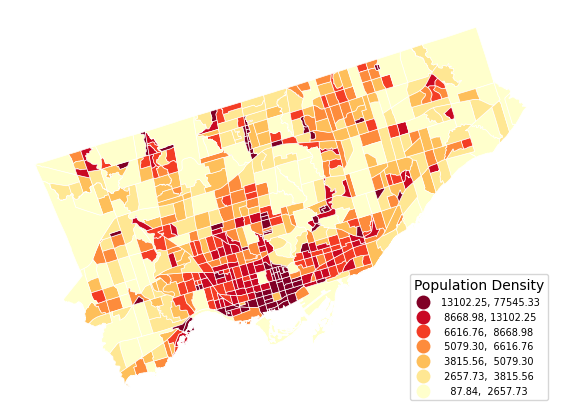

In [17]:
census_tracts_data["population density"] = census_tracts_data["population_2021"] / census_tracts_data["landarea"]

fig, ax = plt.subplots(figsize=(7, 7))

census_tracts_data.to_crs(4326).plot(
    column = "population density",
    edgecolor="White",
    cmap = 'YlOrRd', 
    k = 7,
    scheme = "Quantiles", 
    linewidth=0.5,
    legend = True,
    zorder=1,
    legend_kwds = {
        "loc": "lower right",
        "fontsize": 7,
        "title": "Population Density",
        "alignment": "left",
        "reverse": True
    },
    ax=ax
).set_axis_off()

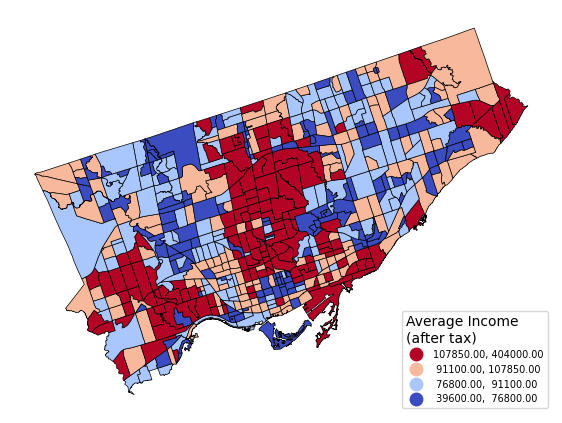

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))

census_tracts_data.plot(
    column = "avg_aftertax_hhld_income_2020",
    edgecolor="Black",
    cmap = 'coolwarm', 
    k = 4,
    scheme = "Quantiles", 
    linewidth=0.5,
    legend = True,
    legend_kwds = {
        "loc": "lower right",
        "fontsize": 7,
        "title": "Average Income\n(after tax)",
        "alignment": "left",
        "reverse": True
    },
    ax=ax
).set_axis_off()


## Interactive Exploration

TODO: explore()

pip install folium matplotlib mapclassify

In [24]:
transit_stops.explore(
    column='LOCATION_N',  # Popup labels
    tiles="CartoDB Positron", 
    marker_kwds={"radius": 5}
)

## Layering Multiple Datasets

"Like GIS layers: background (tracts) + overlays (transit)."

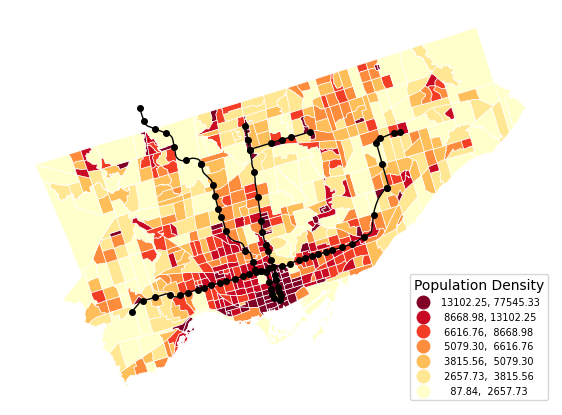

In [30]:
fig, ax = plt.subplots(figsize=(7, 7))

transit_routes.to_crs(4326).plot(
    linewidth = 1,
    color="Black",
    ax = ax,
    zorder=3
)

transit_stops.to_crs(4326).plot(
    color="Black",
    markersize = 16,
    ax = ax,
    zorder=2
)

census_tracts_data.to_crs(4326).plot(
    column = "population density",
    edgecolor="White",
    cmap = 'YlOrRd', 
    k = 7,
    scheme = "Quantiles", 
    linewidth=0.5,
    legend = True,
    zorder=1,
    legend_kwds = {
        "loc": "lower right",
        "fontsize": 7,
        "title": "Population Density",
        "alignment": "left",
        "reverse": True
    },
    ax=ax
).set_axis_off()